<a href="https://colab.research.google.com/github/fatihanadias/CapstoneBangkit/blob/master/%5BFinal_Ver_%5D_Bismillah_Ya_Allah_Tolong_Ini_Skin_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# Import relevant libraries for the project
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.resnet50 import ResNet50
from keras.applications import VGG16

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

# Mengatur Direktori

In [ ]:
!git clone -b master https://github.com/fatihanadias/CapstoneBangkit.git

Cloning into 'CapstoneBangkit'...
remote: Enumerating objects: 8443, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 8443 (delta 1), reused 5 (delta 1), pack-reused 8429
Receiving objects: 100% (8443/8443), 325.22 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
#!rm -rf CapstoneBangkit

In [ ]:
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content


In [ ]:
%cd CapstoneBangkit

/content/CapstoneBangkit


# Memuat Dataset

In [ ]:
import os
import glob
import random

main_path = '/content/CapstoneBangkit'

all_path = os.path.join(main_path, "Training")

def get_images_in_class(class_path, formats=[".jpg", ".png"], sample_size=None):
    images = []
    for fmt in formats:
        images.extend(glob.glob(os.path.join(class_path, f"*{fmt}")))
    if sample_size is not None:
        images = random.sample(images, min(len(images), sample_size))
    return images

# Mendapatkan semua gambar dalam setiap kelas di direktori train dengan sampling
train_oily = get_images_in_class(os.path.join(all_path, "oily"), sample_size=250)
train_dry = get_images_in_class(os.path.join(all_path, "dry"), sample_size=250)
train_normal = get_images_in_class(os.path.join(all_path, "normal"), sample_size=250)

# Mendapatkan semua gambar dalam setiap kelas di direktori test dengan sampling
test_oily = get_images_in_class(os.path.join(all_path, "oily"), sample_size=20)
test_dry = get_images_in_class(os.path.join(all_path, "dry"), sample_size=20)
test_normal = get_images_in_class(os.path.join(all_path, "normal"), sample_size=20)

# Mendapatkan semua gambar dalam setiap kelas di direktori validation dengan sampling
valid_oily = get_images_in_class(os.path.join(all_path, "oily"), sample_size=50)
valid_dry = get_images_in_class(os.path.join(all_path, "dry"), sample_size=50)
valid_normal = get_images_in_class(os.path.join(all_path, "normal"), sample_size=50)

In [ ]:
# Contoh print untuk memastikan gambar ditemukan
print("Train oily:", len(train_oily))
print("Train dry:", len(train_dry))
print("Train normal:", len(train_normal))

print("Test oily:", len(test_oily))
print("Test dry:", len(test_dry))
print("Test normal:", len(test_normal))

print("Validation oily:", len(valid_oily))
print("Validation dry:", len(valid_dry))
print("Validation normal:", len(valid_normal))

Train oily: 250
Train dry: 250
Train normal: 250
Test oily: 20
Test dry: 20
Test normal: 20
Validation oily: 50
Validation dry: 50
Validation normal: 50


# Membuat Dataframe dengan Kelas yang Sesuai

In [ ]:
# Membuat DataFrame untuk train set
train_list = train_oily + train_dry + train_normal
train_classes = (['oily'] * len(train_oily) + ['dry'] * len(train_dry) + ['normal'] * len(train_normal))

df_training = pd.DataFrame({'image': train_list, 'class': train_classes})

# Membuat DataFrame untuk test set
test_list = test_oily + test_dry + test_normal
test_classes = (['oily'] * len(test_oily) + ['dry'] * len(test_dry) + ['normal'] * len(test_normal))

df_test = pd.DataFrame({'image': test_list, 'class': test_classes})

# Membuat DataFrame untuk validation set
valid_list = valid_oily + valid_dry + valid_normal
valid_classes = (['oily'] * len(valid_oily) + ['dry'] * len(valid_dry) + ['normal'] * len(valid_normal))

df_valid = pd.DataFrame({'image': valid_list, 'class': valid_classes})


In [ ]:
print(df_training.head())
print(df_test.head())
print(df_valid.head())

print("Jumlah gambar dalam train:", df_training.shape[0])
print("Jumlah gambar dalam test:", df_test.shape[0])
print("Jumlah gambar dalam val:",df_valid.shape[0])


                                                                                                 image  \
0  /content/CapstoneBangkit/Training/oily/oily_6432db3dd454280616a9_jpg.rf.d101d001ce4d1aa1e90fb5cb...   
1  /content/CapstoneBangkit/Training/oily/processed_skin_oily_16ee8079dd45e929ea95_jpg.rf.00fb4943e...   
2            /content/CapstoneBangkit/Training/oily/oily99_jpg.rf.66615c36b33d0483daa57f99e448712e.jpg   
3  /content/CapstoneBangkit/Training/oily/oily_bb64fceefc0dbb2b5d4b_jpg.rf.7c106a4a1cd2db28824e8914...   
4  /content/CapstoneBangkit/Training/oily/processed_skin_oily_0997f02ba99a00439079_jpg.rf.9d02ee792...   

  class  
0  oily  
1  oily  
2  oily  
3  oily  
4  oily  
                                                                                                 image  \
0  /content/CapstoneBangkit/Training/oily/processed_skin_oily_22c14743eaa2735f8a07_jpg.rf.df9331aff...   
1  /content/CapstoneBangkit/Training/oily/processed_skin_oily_2b3033454fa19bade3e4_jpg.rf.9

# Eksplorasi Dataset

## Melihat proporsi tiap kelas

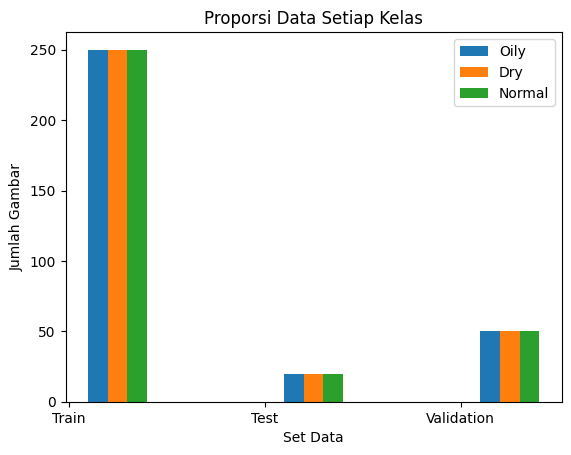

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk menghitung jumlah gambar dalam satu kelas
def count_images_in_class(df, class_name):
    return len(df[df['class'] == class_name])

# Mendapatkan jumlah gambar dalam setiap kelas di setiap set dari DataFrame

train_oily_count = count_images_in_class(df_training, "oily")
train_dry_count = count_images_in_class(df_training, "dry")
train_normal_count = count_images_in_class(df_training, "normal")

test_oily_count = count_images_in_class(df_test, "oily")
test_dry_count = count_images_in_class(df_test, "dry")
test_normal_count = count_images_in_class(df_test, "normal")

valid_oily_count = count_images_in_class(df_valid, "oily")
valid_dry_count = count_images_in_class(df_valid, "dry")
valid_normal_count = count_images_in_class(df_valid, "normal")

# Plot diagram batang
labels = ['Train', 'Test', 'Validation']

oily_counts = [train_oily_count, test_oily_count, valid_oily_count]
dry_counts = [train_dry_count, test_dry_count, valid_dry_count]
normal_counts = [train_normal_count, test_normal_count, valid_normal_count]

x = range(len(labels))
width = 0.1

plt.bar([i + 5*width for i in x], oily_counts, width=width, label='Oily')
plt.bar([i + 6*width for i in x], dry_counts, width=width, label='Dry')
plt.bar([i + 7*width for i in x], normal_counts, width=width, label='Normal')

plt.xlabel('Set Data')
plt.ylabel('Jumlah Gambar')
plt.title('Proporsi Data Setiap Kelas')
plt.xticks([i + 3.5*width for i in x], labels)
plt.legend()
plt.show()


## Mengambil sampel dari tiap kelas

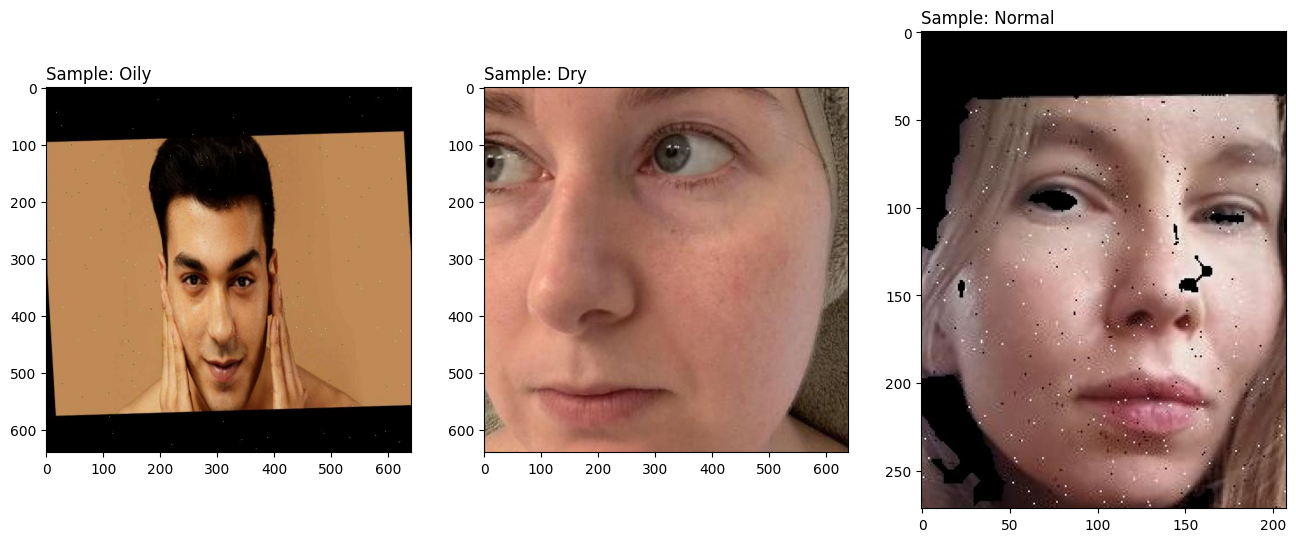

In [ ]:
import os
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan satu sampel gambar dari DataFrame
def get_sample_image(image_path):
    return plt.imread(image_path)

# Ambil sampel gambar dari setiap kelas dalam DataFrame training
sample_oily = get_sample_image(df_training[df_training['class'] == 'oily']['image'].iloc[0])
sample_dry = get_sample_image(df_training[df_training['class'] == 'dry']['image'].iloc[0])
sample_normal = get_sample_image(df_training[df_training['class'] == 'normal']['image'].iloc[0])

# Plot sampel gambar
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Plot gambar berminyak
axes[0].imshow(sample_oily, cmap='gray')
axes[0].set_title('Sample: Oily', loc='left')
axes[0].grid(False)

# Plot gambar kering
axes[1].imshow(sample_dry, cmap='gray')
axes[1].set_title('Sample: Dry', loc='left')
axes[1].grid(False)

# Plot gambar normal
axes[2].imshow(sample_normal, cmap='gray')
axes[2].set_title('Sample: Normal', loc='left')
axes[2].grid(False)

# Tampilkan plot
plt.show()


# Data Preprocessing

### Mendefinisikan callbacks

In [ ]:
from tensorflow.keras.callbacks import Callback

class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='val_accuracy', value=0.95, verbose=1):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            raise ValueError(f"Monitor '{self.monitor}' not found in logs.")
        if current >= self.value:
            if self.verbose > 0:
                print(f"Epoch {epoch}: early stopping threshold reached with {self.monitor} = {current}")
            self.model.stop_training = True


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Callback untuk menghentikan pelatihan ketika akurasi validasi di atas 90%
early_stopping_by_accuracy = EarlyStoppingByAccuracy(monitor='val_accuracy',
                                                     value=0.90, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)



### Mendefinisikan data generator

In [ ]:
# Specify parameters/arguments for data generation
EPOCHS = 50
INIT_LR = 1e-3
decay_rate = 0.95
decay_step = 1
IMAGE_SIZE = [224, 224]
BATCH = 32
SEED = 45

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define instances of ImageDataGenerator
image_shape = (224, 224, 3)
# Check the shape of the arrays and data generator setup
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.7,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    channel_shift_range=0.3
)

val_datagen = ImageDataGenerator(rescale=1/255.,zoom_range=0.5)

test_datagen = ImageDataGenerator(rescale=1/255.,zoom_range=0.5)

In [ ]:
ds_train = train_datagen.flow_from_dataframe(
    df_training,
    x_col='image',
    y_col='class',
    target_size=(image_shape[0], image_shape[1]),
    class_mode='categorical',
    batch_size=32,
    seed=42
)

ds_val = val_datagen.flow_from_dataframe(
    df_valid,
    x_col='image',
    y_col='class',
    target_size=(image_shape[0], image_shape[1]),
    class_mode='categorical',
    batch_size=32,
    seed=42
)

ds_test = test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='class',
    target_size=(image_shape[0], image_shape[1]),
    class_mode='categorical',
    batch_size=1,
    shuffle=False
)

Found 750 validated image filenames belonging to 3 classes.
Found 150 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


# Building Model

Referensi : [Human Skin Type Classification](https://www.sciencedirect.com/science/article/pii/S2405844023083846)

In [ ]:
image_shape = (224, 224, 3)

### Mendefinisikan model performance

In [ ]:
def model_performance(history, Epochs):
    # Define needed variables
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    Epochs = [i+1 for i in range(len(tr_acc))]

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

# Evaluate the model
def model_evaluation(model, train_gen, valid_gen, test_gen):
    train_score = model.evaluate(train_gen, verbose= 1)
    valid_score = model.evaluate(valid_gen, verbose= 1)
    test_score = model.evaluate(test_gen, verbose= 1)

    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])

# Confusion Matrix
def plot_confusion_matrix(model, test_gen):
    # Get Predictions
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)

    g_dict = test_gen.class_indices
    classes = list(g_dict.keys())

    # Display the confusion matrix
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.show()

### Mendefinisikan base model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# Define callbacks
mcp_save = ModelCheckpoint('mobilenetv2_TL.h5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, mode='max')

Model 1

In [ ]:
from keras.applications import VGG19, MobileNetV2, MobileNetV3Large
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from keras.regularizers import l2

# Define input shape
image_shape = (224, 224, 3)

# Load VGG19 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG19 base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(170, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Build the model
mobilenetv2_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
mobilenetv2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
# Calculate the number of batches in the training dataset
num_batches = int(len(ds_train))

# Fit the model
history = mobilenetv2_model.fit(ds_train, epochs=200, steps_per_epoch=num_batches,  # Integer division for steps
                    verbose=1, validation_data=ds_val, callbacks=[mcp_save, reduce_lr])

Epoch 1/200
24/24 [==============================] - 26s 716ms/step - loss: 1.1147 - accuracy: 0.4147 - val_loss: 1.1188 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/200
24/24 [==============================] - 18s 745ms/step - loss: 1.0589 - accuracy: 0.4653 - val_loss: 1.0838 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 3/200
24/24 [==============================] - 18s 753ms/step - loss: 1.0104 - accuracy: 0.4800 - val_loss: 1.1005 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 4/200
24/24 [==============================] - 22s 956ms/step - loss: 0.9691 - accuracy: 0.5200 - val_loss: 0.9727 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 5/200
24/24 [==============================] - 18s 725ms/step - loss: 0.9735 - accuracy: 0.5307 - val_loss: 1.0352 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 6/200
24/24 [==============================] - 36s 2s/step - loss: 0.9547 - accuracy: 0.5413 - val_loss: 0.9709 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 7/200
24/24 [==============================] - 15s 636m

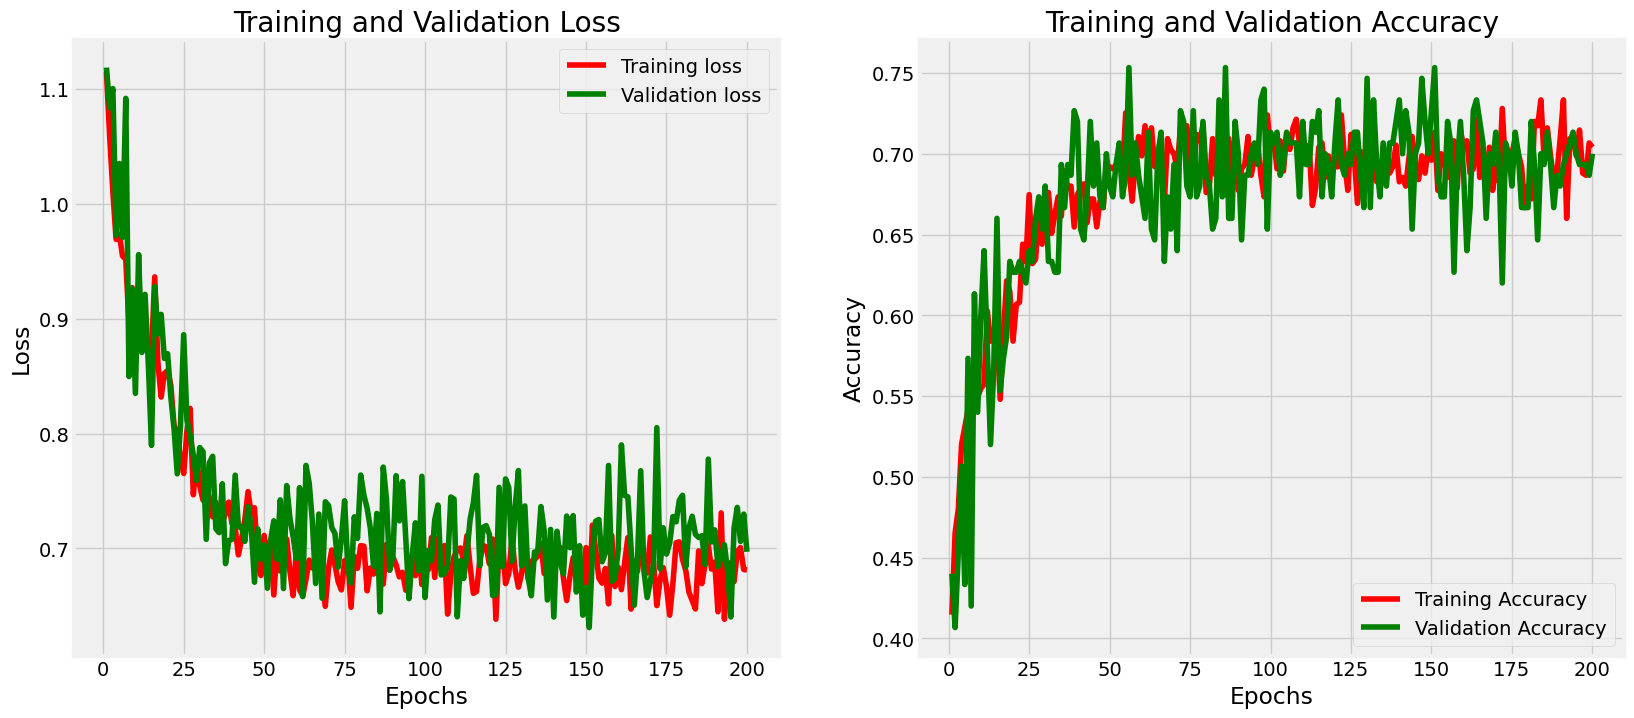

In [ ]:
model_performance(history, 200)

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 112.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [ ]:
model = tf.keras.models.load_model('/content/CapstoneBangkit/mobilenetv2_TL.h5')
tf.saved_model.save(model, '/content/CapstoneBangkit/saved_model')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d37b443d7e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d37b443d7e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
!tensorflowjs_converter --input_format keras /content/CapstoneBangkit/mobilenetv2_TL.h5 /content/my_tfjs_model

2024-06-17 08:35:21.255838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from google.colab import files
# Contoh: Mengunduh folder my_tfjs_model sebagai zip
!zip -r /content/my_tfjs_model.zip /content/my_tfjs_model
files.download('/content/my_tfjs_model.zip')

  adding: content/my_tfjs_model/ (stored 0%)
  adding: content/my_tfjs_model/group1-shard3of3.bin (deflated 8%)
  adding: content/my_tfjs_model/model.json (deflated 96%)
  adding: content/my_tfjs_model/group1-shard1of3.bin (deflated 7%)
  adding: content/my_tfjs_model/group1-shard2of3.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>